In [1]:
import pandas as pd
import numpy as np

In [2]:
# Para evitar el UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [3]:
# Leemos nuestro conjunto de datos (dataset)
df = pd.read_csv('Mall_Customers.csv')

In [4]:
# Revisamos los primeros cinco valores del dataset, de acá podemos analizar que variables nos interesan para el modelo
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Verificamos el número de filas y columnas que tenga nuestro dataset
df.shape

(200, 5)

In [6]:
# Imprimimos un resumen de nuestro dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Comprobamos que no existan valores nulos, de haberlos debemos buscar una forma de trabajar con ellos o eliminarlos
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# Inspecionamos si existen valores duplicados en el dataset
df.duplicated().sum()

0

In [9]:
# Revisamos el resumen estadistico de nuestro dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sns.set(style="whitegrid")

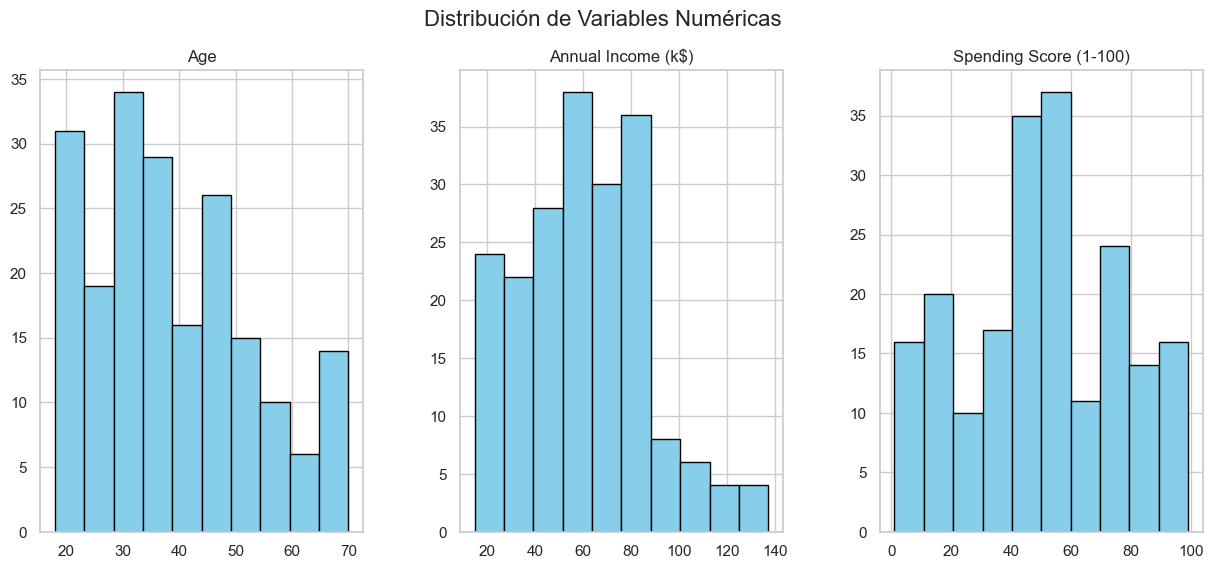

In [12]:
# Histogramas de las variables numéricas
numeric_columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
df[numeric_columns].hist(bins=10, figsize=(15, 6), layout=(1, 3), color='skyblue', edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.show()

In [13]:
# La edad se distribuye entre diferentes grupos etarios, pero la mayoría de los visitantes del centro comercial tienen entre 20 y 40 años.
# siendo el rango de edad más frecuente entre los 30 y 35 años.

# La mayoría de los visitantes tienen un ingreso entre 60k y 80k, con el pico en 60k.
# Existe una distribución sesgada hacia la derecha, ya que menos visitantes tienen un ingreso superior a 100k.

# El puntaje de gasto sigue una distribución normal. La mayoría de los visitantes tienen un puntaje de gasto entre 40 y 60.

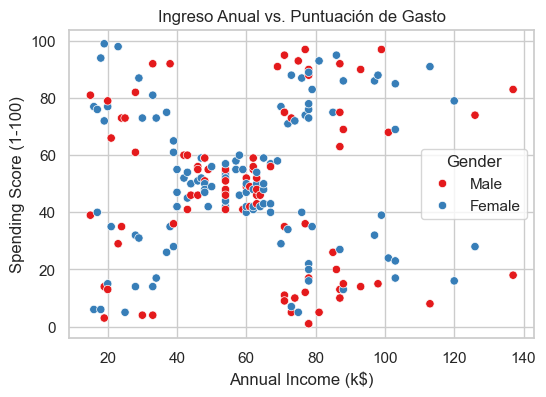

In [14]:
# Gráfica de dispersión: Annual Income vs. Spending Score
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender', palette='Set1')
plt.title('Ingreso Anual vs. Puntuación de Gasto')
plt.show()

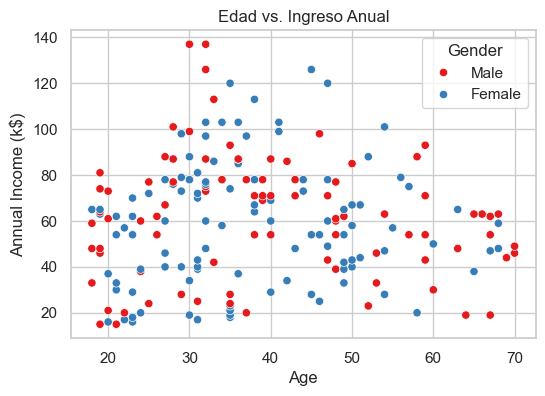

In [15]:
# Gráfica de dispersión: Age vs. Annual Income
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, hue='Gender', palette='Set1')
plt.title('Edad vs. Ingreso Anual')
plt.show()

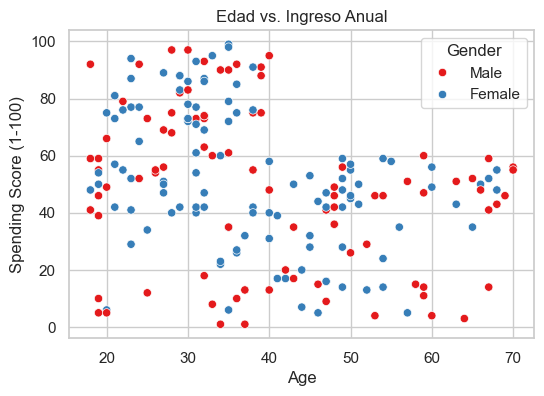

In [16]:
# Gráfica de dispersión: Age vs. Annual Income
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue='Gender', palette='Set1')
plt.title('Edad vs. Ingreso Anual')
plt.show()

In [17]:
# Si observamos las tres graficas, es claro que las variables Annual Income (k$) y Spending Score (1-100)
# son las unicas que intentan formar clusteres, por lo que serán nuestras dos variables para el modelo

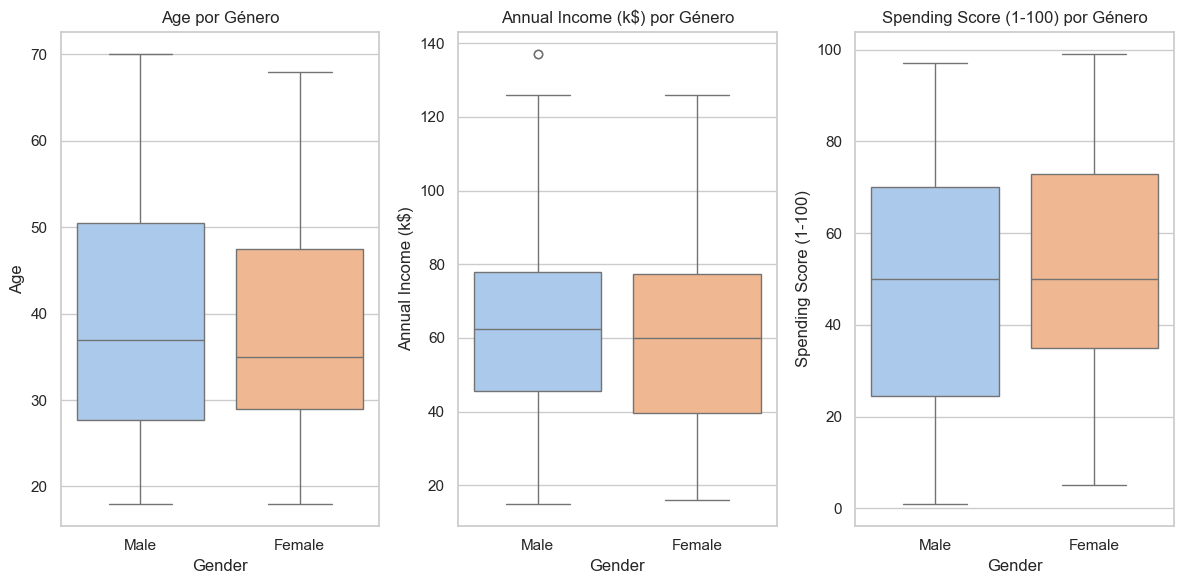

In [18]:
# Boxplot de variables numéricas por género
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Gender', y=col, data=df, palette='pastel', hue='Gender')
    plt.title(f'{col} por Género')
plt.tight_layout()
plt.show()

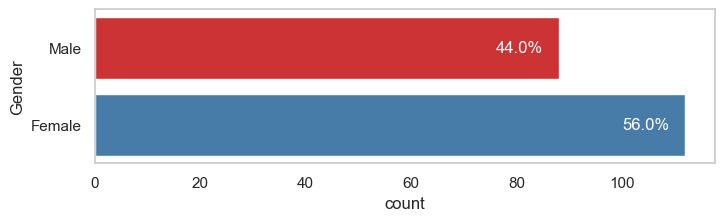

In [19]:
conteo_de_generos = df['Gender'].value_counts()

plt.figure(1 , figsize = (8 , 2))
sns.countplot(y = 'Gender', hue='Gender', data = df, palette='Set1')

for i in df['Gender'].unique():
    count = conteo_de_generos[i]
    percentage = (count / df.shape[0]) * 100
    plt.text(count - 12, i, f'{percentage:.1f}%', va='center', color='w')

plt.grid(False)
plt.show()

In [20]:
# La distribución de género es bastante equilibrada, con un 56% de clientes femeninos y un 44% masculinos
# lo que refleja una ligera mayoría femenina del 6%.

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
# Preparamos las columnas con las que vamos a trabajar y empezamos a preprocesar
columns_to_scale = ["Annual Income (k$)", "Spending Score (1-100)"]

In [23]:
# Normalizamos las variables numéricas
scaler = StandardScaler()
data_scaled = df.copy()
data_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [24]:
# Verificamos los datos preprocesados
print("Datos preprocesados:")
print(data_scaled.head())

Datos preprocesados:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19           -1.738999               -0.434801
1           2    Male   21           -1.738999                1.195704
2           3  Female   20           -1.700830               -1.715913
3           4  Female   23           -1.700830                1.040418
4           5  Female   31           -1.662660               -0.395980


In [25]:
# Seleccionar las características más relevantes, excluimos la columna CustomerID, Age y Gender ya que no son relevantes para nuestro clustering, pero podríamos utilizarlos en otros análisis más avanzados.
X = data_scaled[columns_to_scale]

# Verificar el subconjunto seleccionado
print("Conjunto de datos para clustering:")
print(X.head())

Conjunto de datos para clustering:
   Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980


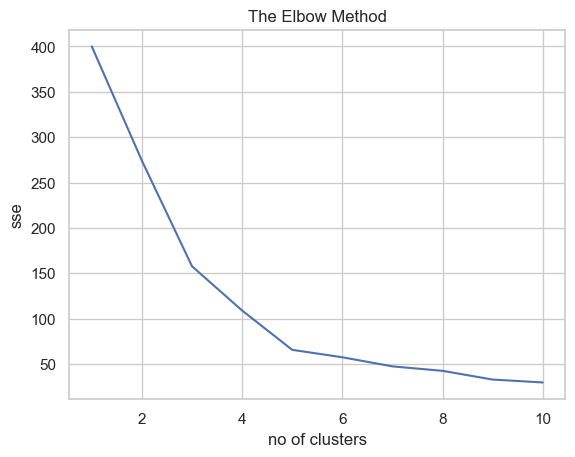

In [26]:
# Utilizaremos el método del codo para determinar un valor inicial k para nuestro modelo de clustering K-Means
from sklearn.cluster import KMeans

sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++')
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1,11), sse)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('sse')
plt.show()

Centroides del modelo K-Means:
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]
 [-1.32954532  1.13217788]]


C:\Users\Tavo\AppData\Local\Temp\ipykernel_16532\3888951967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.fit_predict(X)


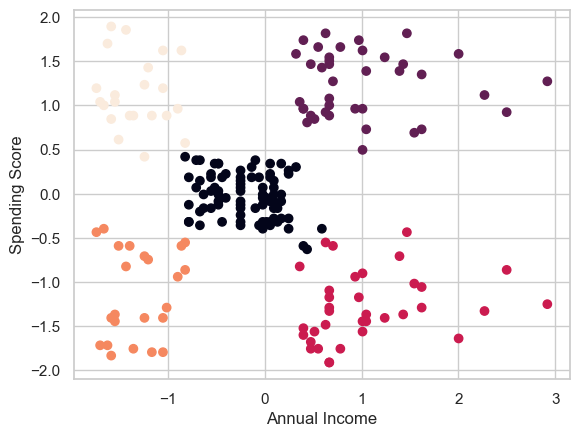

In [27]:
# Después de identificar el valor óptimo de k=5, podemos entrenar el modelo y asignar las etiquetas.

k_optimo = 5
kmeans = KMeans(n_clusters=k_optimo, random_state=0, init='k-means++')
X['Cluster'] = kmeans.fit_predict(X)

# Centroides del modelo
print("Centroides del modelo K-Means:")
print(kmeans.cluster_centers_)

# Visualizar datos con clusters asignados
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c= X['Cluster'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [28]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calcular el Coeficiente de Silhouette
silhouette_avg_kmeans = silhouette_score(X[["Annual Income (k$)", "Spending Score (1-100)"]], X['Cluster'])
print("Coeficiente de Silhouette:", silhouette_avg_kmeans)

# Calcular el Índice de Calinski-Harabasz
calinski_harabasz_kmeans = calinski_harabasz_score(X[["Annual Income (k$)", "Spending Score (1-100)"]], X['Cluster'])
print("Índice de Calinski-Harabasz:", calinski_harabasz_kmeans)

Coeficiente de Silhouette: 0.5546571631111091
Índice de Calinski-Harabasz: 248.64932001536357


In [29]:
# Coeficiente de Silhouette: 0.55

# Un valor de 0.55 sugiere que los puntos dentro de los clústeres están razonablemente bien agrupados y separados de otros clústeres.
# Idealmente, un coeficiente más cercano a 1 indica mejor cohesión dentro de los clusters y separación entre ellos.
# Este valor está en un rango moderado, por lo que los clusters son razonables, pero podrían mejorarse.

# Índice de Calinski-Harabasz: 248.65

# Un valor más alto en esta métrica es mejor y sugiere que los clusters están bien formados y son distintivos.
# Este valor indica que el modelo tiene una buena separación entre los clusters.

In [30]:
# Los resultados muestran que el modelo está logrando una agrupación aceptable, aunque podría no ser perfecta.
# La configuración de 5 clusters parece razonable, pero podríamos revisar con otros valores de k para ver si encontramos mejoría.

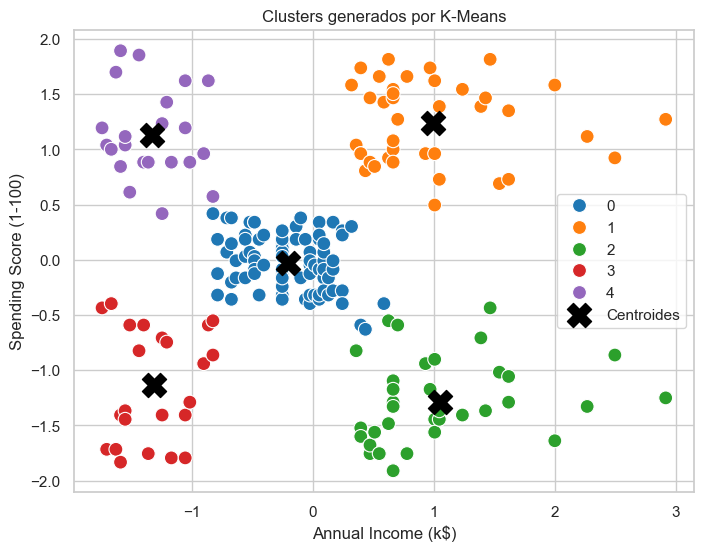

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)',
    hue='Cluster', data=X, palette='tab10', s=100
)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroides', marker='X')
plt.title('Clusters generados por K-Means')
plt.legend()
plt.show()

In [32]:
# Hierarchical Clustering

In [33]:
import scipy.cluster.hierarchy as sch

In [34]:
X = np.array(df[columns_to_scale])

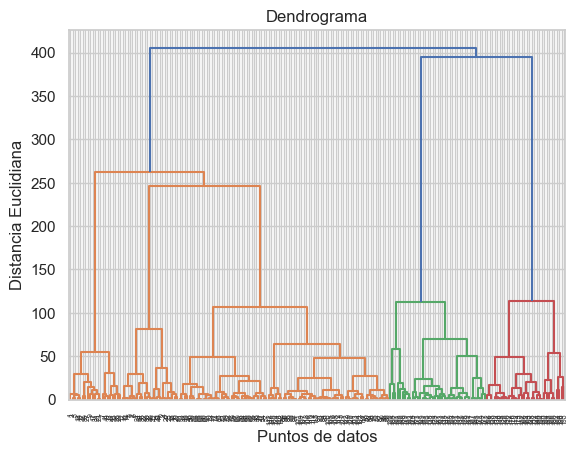

In [35]:
# El dendrograma nos ayuda a identificar el número de clusters mediante el "corte" en el árbol jerárquico.
# Es un gráfico que representa cómo se agrupan los puntos de datos en un modelo jerárquico.
# El eje Y muestra la distancia (o similitud) entre los datos, y el eje X son los puntos de datos individuales.
# El propósito principal del dendrograma es ayudarte a determinar cuántos clusters son óptimos cortando el árbol en una altura específica.
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia Euclidiana')
plt.show()

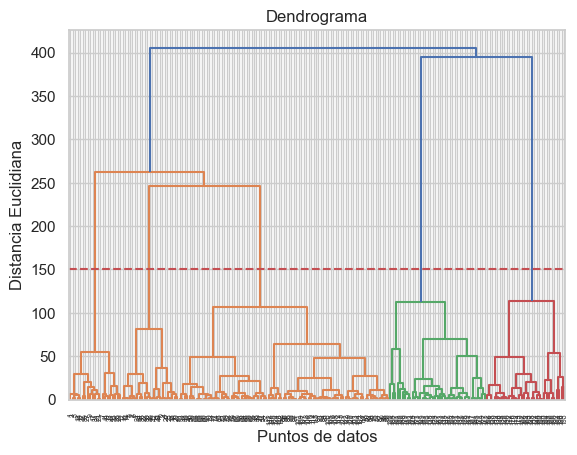

In [36]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Puntos de datos')
plt.axhline(y=150, color='r', linestyle='--')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [37]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
optimal_clusters = 5
hc = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [39]:
X_hc = df[columns_to_scale]
X_hc['Cluster'] = pd.DataFrame(y_hc)

C:\Users\Tavo\AppData\Local\Temp\ipykernel_16532\3700918809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_hc['Cluster'] = pd.DataFrame(y_hc)


In [40]:
X_hc

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


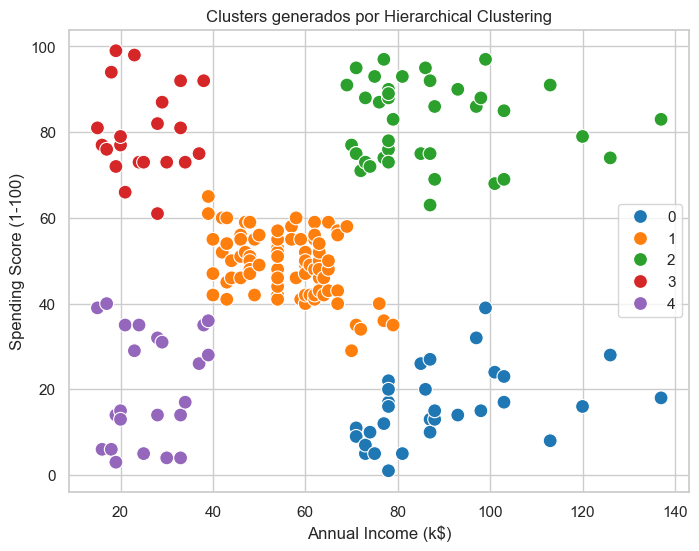

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)',
    hue='Cluster', data=X_hc, palette='tab10', s=100
)
plt.title('Clusters generados por Hierarchical Clustering')
plt.legend()
plt.show()

In [42]:
# Calcular métricas
silhouette_avg_hc = silhouette_score(X_hc[["Annual Income (k$)", "Spending Score (1-100)"]], y_hc)
calinski_harabasz_hc = calinski_harabasz_score(X_hc[["Annual Income (k$)", "Spending Score (1-100)"]], y_hc)

print("Coeficiente de Silhouette:", silhouette_avg_hc)
print("Índice de Calinski-Harabasz:", calinski_harabasz_hc)

Coeficiente de Silhouette: 0.5529945955148897
Índice de Calinski-Harabasz: 243.07142892964563


In [43]:
# Los resultados que obtuvimos con los dos algoritmos de clustering (K-means y Jerárquico) son bastante cercanos.
# Sin embargo, las diferencias no son grandes, por lo que ambos métodos parecen funcionar bien.

In [44]:
# Estrategias de analisis de negocio para cada cluster

# 1. Centrar los esfuerzos de marketing en el Cluster 2, ya que tienen tanto altos ingresos como altas puntuaciones de gasto,
# lo que indica que son los clientes más valiosos en nuestro conjunto de datos.

# 2. Con respecto al Grupo 3 podríamos dirigirnos a ellos con productos o servicios que apelen al estatus o al valor, ya que gastan mucho
# en relación con sus ingresos.

# 3. Los clientes del grupo 0 tienen ingresos elevados, pero actualmente gastan menos. Las estrategias para aumentar el gasto
# serían ofertas exclusivas o programas de fidelización.

# 4. El grupo 1 constituye el segmento más numeroso. Las ofertas coherentes y basadas en el valor pueden ayudar a retener a 
# este grupo básico de clientes.

# 5. El grupo 4 puede requerir enfoques de marketing más ajustados al presupuesto y ofertas con descuento para aumentar su gasto.

In [45]:
# En general, la presencia de clusters distintos sugiere que los datos están bien segmentados y que cada grupo
# puede ser objeto de estrategias de marketing a medida.